In [1]:
!pip3 install umap-learn
import numpy as np
print(np.__version__)
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE




[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


2.0.2


Load data


In [2]:
data = pd.read_csv('pca_data.txt', sep=' ', header=None)

Standardization of the dataset

In [3]:
data_standardized = (data - data.mean(axis=0)) / data.std(axis=0)

Covariance Matrix

In [4]:
cov_matrix = np.cov(data_standardized.T)

In [5]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

Descending sort

In [6]:
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

In [7]:
top_2_eigenvectors = eigenvectors[:, :2]
projected_data = np.dot(data_standardized, top_2_eigenvectors)

2D Scatter Plot

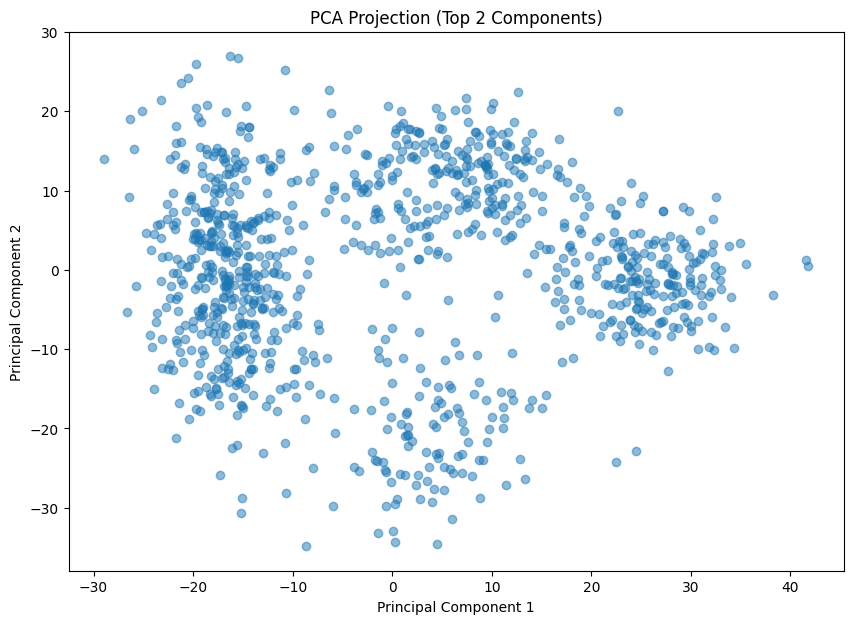

In [8]:
plt.figure(figsize=(10, 7))
plt.scatter(projected_data[:, 0], projected_data[:, 1], alpha=0.5)
plt.title('PCA Projection (Top 2 Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

d:\LEVEL 4 TERM 2\CSE 472\Assignment 4\Assignment 4\Assignment 4\my_venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


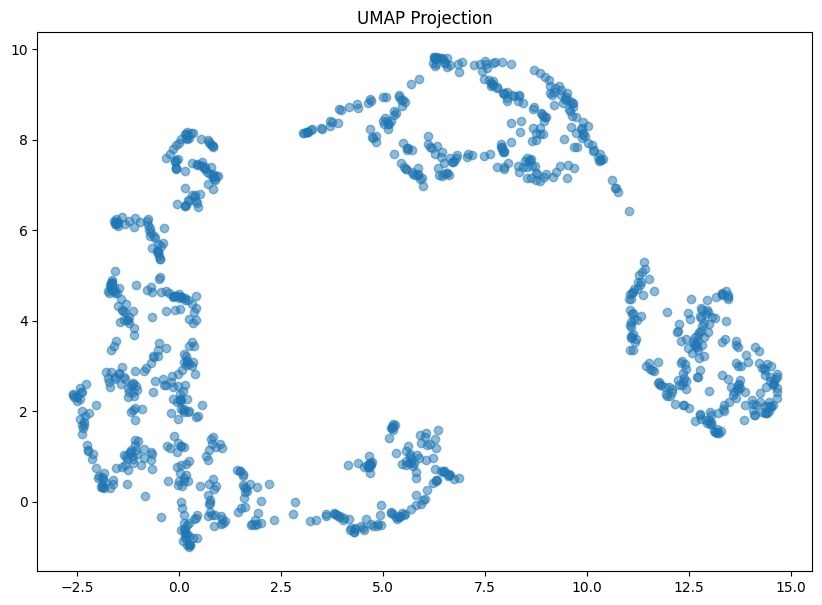

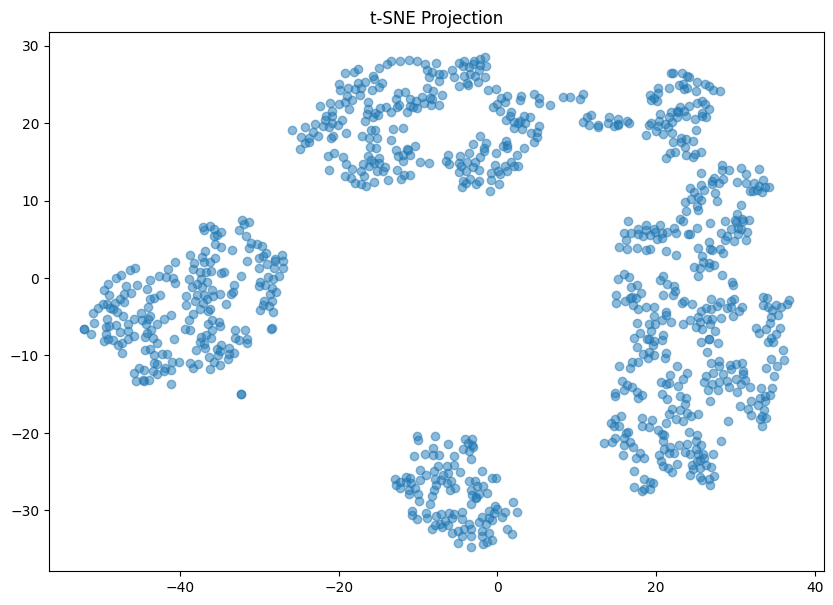

In [9]:
# UMAP plot
import umap
import matplotlib.pyplot as plt


reducer = umap.UMAP(n_neighbors=15, min_dist=0.1)
umap_embedding = reducer.fit_transform(data)

plt.figure(figsize=(10, 7))
plt.scatter(umap_embedding[:, 0], umap_embedding[:, 1], alpha=0.5)
plt.title('UMAP Projection')
plt.show()

# t-SNE plot
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_embedding = tsne.fit_transform(data)

plt.figure(figsize=(10, 7))
plt.scatter(tsne_embedding[:, 0], tsne_embedding[:, 1], alpha=0.5)
plt.title('t-SNE Projection')
plt.show()
